## <font color=blue>Diabetes dataset age 50-70<font>

[Baseline Categorical](#SVM)

[One Hot](#hot)

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, \
f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, SVC
from tqdm import tqdm

In [2]:
def plot_confusion(clf, title, X_test, y_test):
    svm_predicted_mc = clf.predict(X_test)
    confusion_mc = confusion_matrix(y_test, svm_predicted_mc)
    df_cm = pd.DataFrame(confusion_mc, 
                         index = [i for i in range(0,3)], columns = [i for i in range(0,3)])

    plt.figure(figsize=(6,4))
    ax_ticks= ['<30', '>30', 'NO']
    sns.heatmap(df_cm, annot=True, xticklabels=ax_ticks, yticklabels=ax_ticks, fmt='g')
    plt.title(title + '\nAccuracy:{0:.3f}'.format(accuracy_score(y_test, 
                                                                           svm_predicted_mc)))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    print('Micro-averaged precision = {:.2f} (treat instances equally)'
      .format(precision_score(y_test, svm_predicted_mc, average = 'micro')))
    print('Macro-averaged precision = {:.2f} (treat classes equally)'
      .format(precision_score(y_test, svm_predicted_mc, average = 'macro')))
    print('Micro-averaged f1 = {:.2f} (treat instances equally)'
          .format(f1_score(y_test, svm_predicted_mc, average = 'micro')))
    print('Macro-averaged f1 = {:.2f} (treat classes equally)'
          .format(f1_score(y_test, svm_predicted_mc, average = 'macro')))
    print(classification_report(y_test, svm_predicted_mc, target_names=ax_ticks))

In [3]:
df = pd.read_csv("diabetic_data.csv", dtype='category').iloc[:,2:]
df.shape

(101766, 48)

In [4]:
df['age'].head(2)

0     [0-10)
1    [10-20)
Name: age, dtype: category
Categories (10, object): [[0-10), [10-20), [20-30), [30-40), ..., [60-70), [70-80), [80-90), [90-100)]

In [5]:
df = df.loc[(df['age'] == '[50-60)') | (df['age'] == '[60-70)') ]

In [6]:
df.head(2)

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
5,Caucasian,Male,[50-60),?,2,1,2,3,?,?,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,Caucasian,Male,[60-70),?,3,1,2,4,?,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [7]:
df.describe()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,39739,39739,39739,39739,39739,39739,39739,39739,39739,39739,...,39739,39739,39739,39739,39739,39739,39739,39739,39739,39739
unique,6,3,2,10,8,25,14,14,18,55,...,1,4,4,2,2,1,2,2,2,3
top,Caucasian,Male,[60-70),?,1,1,7,2,?,?,...,No,No,No,No,No,No,No,No,Yes,NO
freq,28528,20105,22483,38519,20055,26689,21373,6933,16200,19355,...,39739,18161,39402,39735,39738,39739,39738,20598,31012,21755


In [8]:
def show_unique(dataF):
    for c in dataF.columns:
        print(c, dataF[c].unique())
        print('*'*50)

show_unique(df)

race [Caucasian, AfricanAmerican, ?, Other, Asian, Hispanic]
Categories (6, object): [Caucasian, AfricanAmerican, ?, Other, Asian, Hispanic]
**************************************************
gender [Male, Female, Unknown/Invalid]
Categories (3, object): [Male, Female, Unknown/Invalid]
**************************************************
age [[50-60), [60-70)]
Categories (2, object): [[50-60), [60-70)]
**************************************************
weight [?, [75-100), [0-25), [50-75), [125-150), [100-125), [25-50), [175-200), [150-175), >200]
Categories (10, object): [?, [75-100), [0-25), [50-75), ..., [25-50), [175-200), [150-175), >200]
**************************************************
admission_type_id [2, 3, 1, 6, 4, 5, 8, 7]
Categories (8, object): [2, 3, 1, 6, 4, 5, 8, 7]
**************************************************
discharge_disposition_id [1, 3, 6, 2, 11, ..., 15, 28, 27, 9, 19]
Length: 25
Categories (25, object): [1, 3, 6, 2, ..., 28, 27, 9, 19]
*********************

### <font color =blue>1. remove columns with missing data</font>

In [9]:
df = df.drop(columns=['weight', 'payer_code', 'medical_specialty'])
df.head(2)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
5,Caucasian,Male,[50-60),2,1,2,3,31,6,16,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,Caucasian,Male,[60-70),3,1,2,4,70,1,21,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


### <font color=blue> 2. remove incomplete columns and rows </font>

In [10]:
# drop missing values
df = df.replace('?', np.nan)
df = df.replace('Unknown/Invalid', np.nan)
df = df.dropna()
df.shape

(38506, 45)

In [11]:
df = df.drop(columns= df.columns[df.nunique() == 1])

In [12]:
show_unique(df)

race [Caucasian, AfricanAmerican, Other, Asian, Hispanic]
Categories (5, object): [Caucasian, AfricanAmerican, Other, Asian, Hispanic]
**************************************************
gender [Male, Female]
Categories (2, object): [Male, Female]
**************************************************
age [[50-60), [60-70)]
Categories (2, object): [[50-60), [60-70)]
**************************************************
admission_type_id [2, 3, 1, 6, 4, 5, 8, 7]
Categories (8, object): [2, 3, 1, 6, 4, 5, 8, 7]
**************************************************
discharge_disposition_id [1, 3, 6, 2, 11, ..., 15, 28, 27, 9, 19]
Length: 25
Categories (25, object): [1, 3, 6, 2, ..., 28, 27, 9, 19]
**************************************************
admission_source_id [2, 4, 7, 1, 20, ..., 8, 9, 14, 10, 22]
Length: 14
Categories (14, object): [2, 4, 7, 1, ..., 9, 14, 10, 22]
**************************************************
time_in_hospital [3, 4, 7, 1, 12, ..., 9, 8, 10, 13, 14]
Length: 14
Categori

### <font color = blue>3. categorical variables</font>

In [13]:
to_num = ['time_in_hospital', 'num_lab_procedures', 'num_procedures',
         'num_medications', 'number_outpatient', 'number_emergency',
         'number_inpatient', 'number_diagnoses']

to_cat_codes = list(set(df.columns) - set(to_num))

In [14]:
X_features = list(to_num)
for c in to_cat_codes:
    df[c+'_cat'] = df[c].cat.codes        
    X_features += [c+'_cat']
    
X_features.remove('readmitted_cat')
X_features

['time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'miglitol_cat',
 'max_glu_serum_cat',
 'tolbutamide_cat',
 'A1Cresult_cat',
 'diag_1_cat',
 'troglitazone_cat',
 'glipizide_cat',
 'acarbose_cat',
 'glyburide-metformin_cat',
 'glipizide-metformin_cat',
 'glyburide_cat',
 'age_cat',
 'diag_2_cat',
 'diag_3_cat',
 'metformin-pioglitazone_cat',
 'repaglinide_cat',
 'discharge_disposition_id_cat',
 'rosiglitazone_cat',
 'race_cat',
 'nateglinide_cat',
 'tolazamide_cat',
 'diabetesMed_cat',
 'glimepiride-pioglitazone_cat',
 'admission_type_id_cat',
 'change_cat',
 'metformin_cat',
 'admission_source_id_cat',
 'chlorpropamide_cat',
 'insulin_cat',
 'pioglitazone_cat',
 'gender_cat',
 'glimepiride_cat']

In [15]:
df['readmitted'].head(11)

5     >30
6      NO
11    <30
14    >30
15     NO
16    <30
17     NO
25     NO
27    >30
30     NO
33    >30
Name: readmitted, dtype: category
Categories (3, object): [<30, >30, NO]

In [16]:
df['readmitted_cat'].head(11)

5     1
6     2
11    0
14    1
15    2
16    0
17    2
25    2
27    1
30    2
33    1
Name: readmitted_cat, dtype: int8

#### <font color=red>Target Mapping: < 30 = 0, >30 = 1, NO = 2, </font>

### <font color=blue>4. split</font>

In [17]:
for n in to_num:
    df[n] = df[n].astype('int')

df[to_num].dtypes

time_in_hospital      int64
num_lab_procedures    int64
num_procedures        int64
num_medications       int64
number_outpatient     int64
number_emergency      int64
number_inpatient      int64
number_diagnoses      int64
dtype: object

## <font color=green>to Categorical</font>

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    df[X_features], df['readmitted_cat'] , random_state = 0)

In [19]:
X_train.head(2)

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,miglitol_cat,max_glu_serum_cat,...,glimepiride-pioglitazone_cat,admission_type_id_cat,change_cat,metformin_cat,admission_source_id_cat,chlorpropamide_cat,insulin_cat,pioglitazone_cat,gender_cat,glimepiride_cat
18572,6,41,5,15,0,0,1,6,0,2,...,0,0,1,1,8,1,1,1,0,1
11344,10,44,0,11,0,0,2,8,0,2,...,0,0,1,1,8,1,1,1,1,1


In [20]:
y_train.head(2)

18572    1
11344    2
Name: readmitted_cat, dtype: int8

In [21]:
X_test.head(2)

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,miglitol_cat,max_glu_serum_cat,...,glimepiride-pioglitazone_cat,admission_type_id_cat,change_cat,metformin_cat,admission_source_id_cat,chlorpropamide_cat,insulin_cat,pioglitazone_cat,gender_cat,glimepiride_cat
63784,3,42,0,12,0,0,1,3,0,2,...,0,0,0,1,8,1,2,1,0,1
28007,1,45,2,9,0,1,2,7,0,2,...,0,6,1,1,8,1,2,1,0,1


In [22]:
y_test.head(2)

63784    2
28007    0
Name: readmitted_cat, dtype: int8

### <font color=green>min max scaling</font>

In [23]:
X_train.dtypes

time_in_hospital                int64
num_lab_procedures              int64
num_procedures                  int64
num_medications                 int64
number_outpatient               int64
number_emergency                int64
number_inpatient                int64
number_diagnoses                int64
miglitol_cat                     int8
max_glu_serum_cat                int8
tolbutamide_cat                  int8
A1Cresult_cat                    int8
diag_1_cat                      int16
troglitazone_cat                 int8
glipizide_cat                    int8
acarbose_cat                     int8
glyburide-metformin_cat          int8
glipizide-metformin_cat          int8
glyburide_cat                    int8
age_cat                          int8
diag_2_cat                      int16
diag_3_cat                      int16
metformin-pioglitazone_cat       int8
repaglinide_cat                  int8
discharge_disposition_id_cat     int8
rosiglitazone_cat                int8
race_cat    

### <font color=green>before scale</font>

In [24]:
X_train.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,miglitol_cat,max_glu_serum_cat,...,glimepiride-pioglitazone_cat,admission_type_id_cat,change_cat,metformin_cat,admission_source_id_cat,chlorpropamide_cat,insulin_cat,pioglitazone_cat,gender_cat,glimepiride_cat
count,28879.000000,28879.000000,28879.000000,28879.000000,28879.000000,28879.000000,28879.000000,28879.000000,28879.000000,28879.000000,...,28879.0,28879.000000,28879.000000,28879.000000,28879.000000,28879.000000,28879.000000,28879.000000,28879.000000,28879.000000
mean,4.297448,42.629627,1.568475,16.960802,0.371897,0.190034,0.616503,7.443367,0.000173,1.986842,...,0.0,1.055958,0.518335,1.228540,4.768240,1.000762,1.401884,1.082482,0.505904,1.050452
std,2.986133,19.641240,1.819609,8.610018,1.285886,0.992790,1.213108,1.851517,0.013157,0.277451,...,0.0,1.423556,0.499672,0.464459,3.757532,0.029996,0.843731,0.288257,0.499974,0.240009
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,31.000000,0.000000,11.000000,0.000000,0.000000,0.000000,6.000000,0.000000,2.000000,...,0.0,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
50%,3.000000,44.000000,1.000000,16.000000,0.000000,0.000000,0.000000,8.000000,0.000000,2.000000,...,0.0,0.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,6.000000,56.000000,3.000000,21.000000,0.000000,0.000000,1.000000,9.000000,0.000000,2.000000,...,0.0,2.000000,1.000000,1.000000,8.000000,1.000000,2.000000,1.000000,1.000000,1.000000
max,14.000000,121.000000,6.000000,79.000000,40.000000,64.000000,15.000000,16.000000,1.000000,3.000000,...,0.0,7.000000,1.000000,3.000000,13.000000,3.000000,3.000000,3.000000,1.000000,3.000000


In [25]:
X_test.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,miglitol_cat,max_glu_serum_cat,...,glimepiride-pioglitazone_cat,admission_type_id_cat,change_cat,metformin_cat,admission_source_id_cat,chlorpropamide_cat,insulin_cat,pioglitazone_cat,gender_cat,glimepiride_cat
count,9627.000000,9627.000000,9627.000000,9627.000000,9627.000000,9627.000000,9627.000000,9627.000000,9627.000000,9627.000000,...,9627.000000,9627.000000,9627.000000,9627.000000,9627.000000,9627.000000,9627.000000,9627.000000,9627.000000,9627.000000
mean,4.262283,42.728368,1.568401,16.956165,0.357224,0.201413,0.637893,7.470136,0.000208,1.986185,...,0.000104,1.063052,0.517087,1.228420,4.775112,1.000104,1.401891,1.080711,0.500260,1.049237
std,2.943274,19.583930,1.828330,8.642732,1.112352,1.071342,1.257337,1.843057,0.014413,0.279719,...,0.010192,1.431834,0.499734,0.458852,3.764274,0.010192,0.839380,0.285804,0.500026,0.236557
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,31.000000,0.000000,11.000000,0.000000,0.000000,0.000000,6.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
50%,3.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,0.000000,2.000000,...,0.000000,0.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,6.000000,56.000000,3.000000,21.000000,0.000000,0.000000,1.000000,9.000000,0.000000,2.000000,...,0.000000,2.000000,1.000000,1.000000,8.000000,1.000000,2.000000,1.000000,1.000000,1.000000
max,14.000000,114.000000,6.000000,81.000000,26.000000,76.000000,14.000000,16.000000,1.000000,3.000000,...,1.000000,7.000000,1.000000,3.000000,12.000000,2.000000,3.000000,3.000000,1.000000,3.000000


In [26]:
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_features)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_features)

### <font color=green>after scale</font>

In [27]:
X_train.iloc[:,:20].describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,miglitol_cat,max_glu_serum_cat,tolbutamide_cat,A1Cresult_cat,diag_1_cat,troglitazone_cat,glipizide_cat,acarbose_cat,glyburide-metformin_cat,glipizide-metformin_cat,glyburide_cat,age_cat
count,28879.000000,28879.000000,28879.000000,28879.000000,28879.000000,28879.000000,28879.000000,28879.000000,28879.000000,28879.000000,28879.000000,28879.000000,28879.000000,28879.000000,28879.000000,28879.000000,28879.000000,28879.000000,28879.000000,28879.000000
mean,0.253650,0.346914,0.261413,0.204626,0.009297,0.002969,0.041100,0.341797,0.000173,0.662281,0.000104,0.627976,0.359998,0.000035,0.374240,0.001714,0.336092,0.000139,0.365710,0.564562
std,0.229703,0.163677,0.303268,0.110385,0.032147,0.015512,0.080874,0.142424,0.013157,0.092484,0.010192,0.175740,0.171983,0.005884,0.121664,0.030101,0.030579,0.011768,0.112075,0.495823
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.076923,0.250000,0.000000,0.128205,0.000000,0.000000,0.000000,0.230769,0.000000,0.666667,0.000000,0.666667,0.268531,0.000000,0.333333,0.000000,0.333333,0.000000,0.333333,0.000000
50%,0.153846,0.358333,0.166667,0.192308,0.000000,0.000000,0.000000,0.384615,0.000000,0.666667,0.000000,0.666667,0.311888,0.000000,0.333333,0.000000,0.333333,0.000000,0.333333,1.000000
75%,0.384615,0.458333,0.500000,0.256410,0.000000,0.000000,0.066667,0.461538,0.000000,0.666667,0.000000,0.666667,0.509091,0.000000,0.333333,0.000000,0.333333,0.000000,0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
X_train.iloc[:,21:40].describe()

,diag_3_cat,metformin-pioglitazone_cat,repaglinide_cat,discharge_disposition_id_cat,rosiglitazone_cat,race_cat,nateglinide_cat,tolazamide_cat,diabetesMed_cat,glimepiride-pioglitazone_cat,admission_type_id_cat,change_cat,metformin_cat,admission_source_id_cat,chlorpropamide_cat,insulin_cat,pioglitazone_cat,gender_cat,glimepiride_cat
count,28879.000000,28879.0,28879.000000,28879.000000,28879.000000,28879.000000,28879.000000,28879.000000,28879.000000,28879.0,28879.000000,28879.000000,28879.000000,28879.000000,28879.000000,28879.000000,28879.000000,28879.000000,28879.000000
mean,0.254074,0.0,0.338031,0.169960,0.357457,0.405251,0.002424,0.000173,0.782645,0.0,0.150851,0.518335,0.409513,0.366788,0.000381,0.467295,0.360827,0.505904,0.350151
std,0.178277,0.0,0.042672,0.255946,0.090033,0.226867,0.030036,0.013157,0.412453,0.0,0.203365,0.499672,0.154820,0.289041,0.014998,0.281244,0.096086,0.499974,0.080003
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.113376,0.0,0.333333,0.000000,0.333333,0.500000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.333333,0.000000,0.000000,0.333333,0.333333,0.000000,0.333333
50%,0.224204,0.0,0.333333,0.000000,0.333333,0.500000,0.000000,0.000000,1.000000,0.0,0.000000,1.000000,0.333333,0.615385,0.000000,0.333333,0.333333,1.000000,0.333333
75%,0.342675,0.0,0.333333,0.400000,0.333333,0.500000,0.000000,0.000000,1.000000,0.0,0.285714,1.000000,0.333333,0.615385,0.000000,0.666667,0.333333,1.000000,0.333333
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
y_train.describe()

count    28879.000000
mean         1.436996
std          0.677038
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: readmitted_cat, dtype: float64

In [30]:
X_test.shape

(9627, 40)

In [31]:
X_test.iloc[:,:20].describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,miglitol_cat,max_glu_serum_cat,tolbutamide_cat,A1Cresult_cat,diag_1_cat,troglitazone_cat,glipizide_cat,acarbose_cat,glyburide-metformin_cat,glipizide-metformin_cat,glyburide_cat,age_cat
count,9627.000000,9627.000000,9627.000000,9627.000000,9627.000000,9627.000000,9627.000000,9627.000000,9627.000000,9627.000000,9627.0,9627.000000,9627.000000,9627.0,9627.000000,9627.000000,9627.000000,9627.0,9627.000000,9627.000000
mean,0.250945,0.347736,0.261400,0.204566,0.008931,0.003147,0.042526,0.343857,0.000208,0.662062,0.0,0.630034,0.359808,0.0,0.374260,0.001610,0.336311,0.0,0.365777,0.571829
std,0.226406,0.163199,0.304722,0.110804,0.027809,0.016740,0.083822,0.141774,0.014413,0.093240,0.0,0.171083,0.170858,0.0,0.120544,0.028329,0.032093,0.0,0.111228,0.494839
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.333333,0.0,0.000000,0.000000
25%,0.076923,0.250000,0.000000,0.128205,0.000000,0.000000,0.000000,0.230769,0.000000,0.666667,0.0,0.666667,0.267133,0.0,0.333333,0.000000,0.333333,0.0,0.333333,0.000000
50%,0.153846,0.358333,0.166667,0.179487,0.000000,0.000000,0.000000,0.384615,0.000000,0.666667,0.0,0.666667,0.318881,0.0,0.333333,0.000000,0.333333,0.0,0.333333,1.000000
75%,0.384615,0.458333,0.500000,0.256410,0.000000,0.000000,0.066667,0.461538,0.000000,0.666667,0.0,0.666667,0.509091,0.0,0.333333,0.000000,0.333333,0.0,0.333333,1.000000
max,1.000000,0.941667,1.000000,1.025641,0.650000,1.187500,0.933333,1.000000,1.000000,1.000000,0.0,1.000000,1.001399,0.0,1.000000,0.500000,1.000000,0.0,1.000000,1.000000


In [32]:
X_test.iloc[:,21:40].describe()

,diag_3_cat,metformin-pioglitazone_cat,repaglinide_cat,discharge_disposition_id_cat,rosiglitazone_cat,race_cat,nateglinide_cat,tolazamide_cat,diabetesMed_cat,glimepiride-pioglitazone_cat,admission_type_id_cat,change_cat,metformin_cat,admission_source_id_cat,chlorpropamide_cat,insulin_cat,pioglitazone_cat,gender_cat,glimepiride_cat
count,9627.000000,9627.000000,9627.000000,9627.000000,9627.000000,9627.000000,9627.000000,9627.000000,9627.000000,9627.000000,9627.000000,9627.000000,9627.000000,9627.000000,9627.000000,9627.000000,9627.000000,9627.000000,9627.000000
mean,0.251785,0.000104,0.337315,0.166112,0.357155,0.402098,0.002112,0.000519,0.773138,0.000104,0.151865,0.517087,0.409473,0.367316,0.000052,0.467297,0.360237,0.500260,0.349746
std,0.174550,0.010192,0.039274,0.254529,0.089942,0.229437,0.031252,0.022785,0.418824,0.010192,0.204548,0.499734,0.152951,0.289560,0.005096,0.279793,0.095268,0.500026,0.078852
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.113376,0.000000,0.333333,0.000000,0.333333,0.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.333333,0.333333,0.000000,0.333333
50%,0.224204,0.000000,0.333333,0.000000,0.333333,0.500000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.333333,0.615385,0.000000,0.333333,0.333333,1.000000,0.333333
75%,0.343949,0.000000,0.333333,0.360000,0.333333,0.500000,0.000000,0.000000,1.000000,0.000000,0.285714,1.000000,0.333333,0.615385,0.000000,0.666667,0.333333,1.000000,0.333333
max,0.984713,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.923077,0.500000,1.000000,1.000000,1.000000,1.000000


In [33]:
y_test.describe()

count    9627.000000
mean        1.431183
std         0.678018
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: readmitted_cat, dtype: float64

<a id='SVM'></a>

### <font color=green>Baseline Categorical</font>

In [34]:
%%time
from sklearn.dummy import DummyClassifier

d_major = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)

print('train accuracy: {:.2f}'.format(d_major.score(X_train, y_train)))
print('test accuracy: {:.2f}'.format(d_major.score(X_test, y_test)))

train accuracy: 0.54
test accuracy: 0.54
CPU times: user 5.17 ms, sys: 79 µs, total: 5.24 ms
Wall time: 35.9 ms


<IPython.core.display.Javascript object>


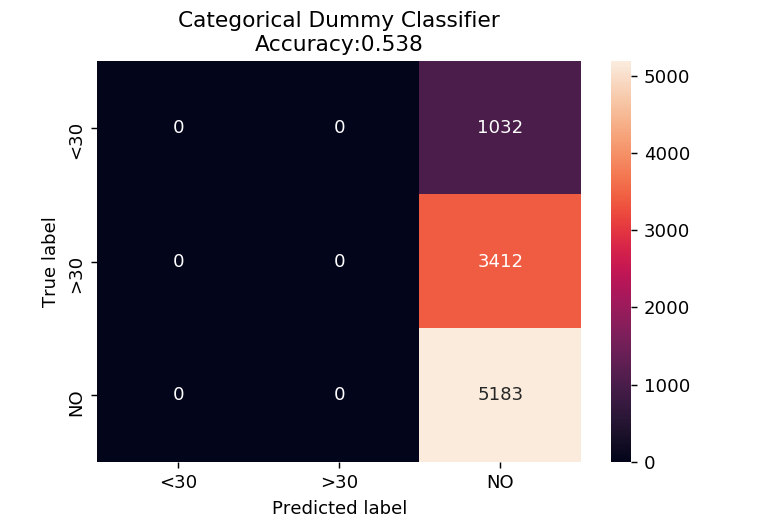

Micro-averaged precision = 0.54 (treat instances equally)
Macro-averaged precision = 0.18 (treat classes equally)
Micro-averaged f1 = 0.54 (treat instances equally)
Macro-averaged f1 = 0.23 (treat classes equally)
             precision    recall  f1-score   support

        <30       0.00      0.00      0.00      1032
        >30       0.00      0.00      0.00      3412
         NO       0.54      1.00      0.70      5183

avg / total       0.29      0.54      0.38      9627



/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [35]:
plot_confusion(d_major, 'Categorical Dummy Classifier', X_test, y_test)

In [36]:
%%time
clf = LinearSVC(verbose=True).fit(X_train, y_train)

print('training accuracy: {:.2f}'.format(clf.score(X_train, y_train)))
print('test accuracy: {:.2f}'.format(clf.score(X_test, y_test)))
plot_confusion(clf, 'Categorical Linear Kernel', X_test, y_test)

[LibLinear]training accuracy: 0.58
test accuracy: 0.58


<IPython.core.display.Javascript object>

Micro-averaged precision = 0.58 (treat instances equally)
Macro-averaged precision = 0.37 (treat classes equally)
Micro-averaged f1 = 0.58 (treat instances equally)
Macro-averaged f1 = 0.35 (treat classes equally)
             precision    recall  f1-score   support

        <30       0.00      0.00      0.00      1032
        >30       0.52      0.24      0.33      3412
         NO       0.59      0.91      0.72      5183

avg / total       0.50      0.58      0.50      9627

CPU times: user 3.93 s, sys: 7.92 ms, total: 3.94 s
Wall time: 3.77 s


/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### <font color=green>SVM optimise over accuracy</font>

In [37]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

clf = SVC() 

grid_values = [
  {'C': [0.1, 1, 10, 100, 1000], 'kernel':['linear', 'sigmoid']}, 
    {'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100], 'kernel':['rbf']},
    {'C': [0.1, 1, 10, 100, 1000], 'degree':[2, 3, 4, 5], 'kernel': ['poly']}
 ]

grid_clf_acc = GridSearchCV(clf, param_grid = grid_values, n_jobs= 3)
grid_clf_acc.fit(X_train, y_train)
y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_test) 

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

Grid best parameter (max. accuracy):  {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
Grid best score (accuracy):  0.5819799854565602
CPU times: user 5min 4s, sys: 2.15 s, total: 5min 6s
Wall time: 3h 34min 23s


In [38]:
pd.DataFrame(grid_clf_acc.cv_results_).sort_values(by=['mean_test_score'], ascending=False).iloc[:,2:8]

/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/ho

,mean_test_score,mean_train_score,param_C,param_degree,param_gamma,param_kernel
34,0.581980,0.616313,100,NaN,0.1,rbf
33,0.581634,0.591606,100,NaN,0.05,rbf
40,0.581426,0.622632,1000,NaN,0.05,rbf
39,0.580456,0.583781,1000,NaN,0.01,rbf
61,0.580249,0.584906,1000,2,NaN,poly
27,0.580179,0.585096,10,NaN,0.1,rbf
8,0.579383,0.579296,1000,NaN,NaN,linear
6,0.579141,0.579141,100,NaN,NaN,linear
4,0.578240,0.578465,10,NaN,NaN,linear
62,0.578136,0.585529,1000,3,NaN,poly


In [39]:
plot_confusion(grid_clf_acc, 'Categorical Grid Search Linear', X_test,y_test)

<IPython.core.display.Javascript object>

Micro-averaged precision = 0.58 (treat instances equally)
Macro-averaged precision = 0.37 (treat classes equally)
Micro-averaged f1 = 0.58 (treat instances equally)
Macro-averaged f1 = 0.36 (treat classes equally)
             precision    recall  f1-score   support

        <30       0.00      0.00      0.00      1032
        >30       0.52      0.29      0.37      3412
         NO       0.60      0.89      0.72      5183

avg / total       0.51      0.58      0.52      9627



### best parameter

In [38]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

clf = SVC() 

grid_values = [
    {'C': [100], 'gamma': [0.1], 'kernel':['rbf']}
 ]

grid_clf_acc = GridSearchCV(clf, param_grid = grid_values, n_jobs= 1)
grid_clf_acc.fit(X_train, y_train)
y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_test) 

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

Grid best parameter (max. accuracy):  {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
Grid best score (accuracy):  0.5819799854565602
CPU times: user 8min 13s, sys: 834 ms, total: 8min 14s
Wall time: 8min 14s


<IPython.core.display.Javascript object>


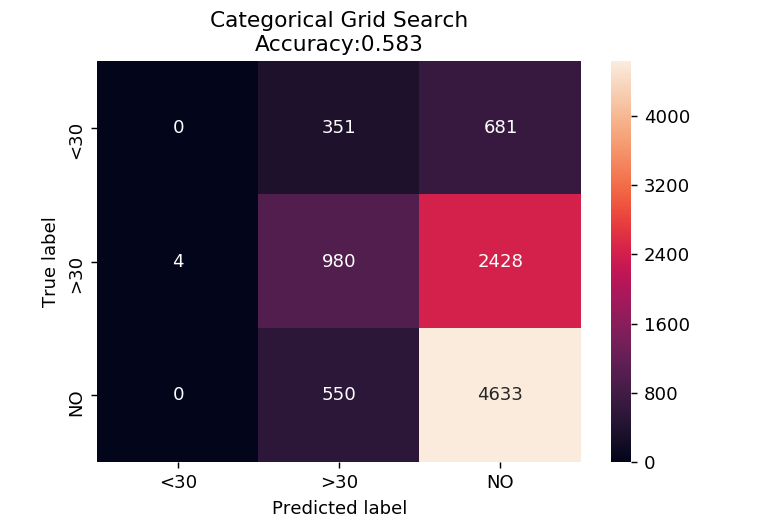

Micro-averaged precision = 0.58 (treat instances equally)
Macro-averaged precision = 0.37 (treat classes equally)
Micro-averaged f1 = 0.58 (treat instances equally)
Macro-averaged f1 = 0.36 (treat classes equally)
             precision    recall  f1-score   support

        <30       0.00      0.00      0.00      1032
        >30       0.52      0.29      0.37      3412
         NO       0.60      0.89      0.72      5183

avg / total       0.51      0.58      0.52      9627



In [39]:
plot_confusion(grid_clf_acc, 'Categorical Grid Search', X_test,y_test)

<a id='hot'></a>

## <font color=Orange>One Hot</font>

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    df[X_features], df['readmitted_cat'] , random_state = 0)

In [19]:
X_train.dtypes

time_in_hospital                int64
num_lab_procedures              int64
num_procedures                  int64
num_medications                 int64
number_outpatient               int64
number_emergency                int64
number_inpatient                int64
number_diagnoses                int64
glyburide_cat                    int8
age_cat                          int8
admission_type_id_cat            int8
glimepiride-pioglitazone_cat     int8
change_cat                       int8
diag_1_cat                      int16
tolazamide_cat                   int8
troglitazone_cat                 int8
insulin_cat                      int8
glimepiride_cat                  int8
admission_source_id_cat          int8
acarbose_cat                     int8
max_glu_serum_cat                int8
tolbutamide_cat                  int8
metformin-pioglitazone_cat       int8
race_cat                         int8
A1Cresult_cat                    int8
pioglitazone_cat                 int8
chlorpropami

In [20]:
X_train.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,glyburide_cat,age_cat,...,diag_3_cat,discharge_disposition_id_cat,glipizide_cat,glipizide-metformin_cat,gender_cat,rosiglitazone_cat,nateglinide_cat,glyburide-metformin_cat,diag_2_cat,diabetesMed_cat
count,28879.000000,28879.000000,28879.000000,28879.000000,28879.000000,28879.000000,28879.000000,28879.000000,28879.000000,28879.000000,...,28879.000000,28879.000000,28879.000000,28879.000000,28879.000000,28879.000000,28879.000000,28879.000000,28879.000000,28879.000000
mean,4.297448,42.629627,1.568475,16.960802,0.371897,0.190034,0.616503,7.443367,1.097129,5.564562,...,200.448319,4.249004,1.122719,0.000139,0.505904,1.072371,0.007272,1.008276,199.672669,0.782645
std,2.986133,19.641240,1.819609,8.610018,1.285886,0.992790,1.213108,1.851517,0.336224,0.495823,...,139.947690,6.398640,0.364991,0.011768,0.499974,0.270099,0.090108,0.091736,116.682019,0.412453
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,5.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,2.000000,31.000000,0.000000,11.000000,0.000000,0.000000,0.000000,6.000000,1.000000,5.000000,...,90.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,99.000000,1.000000
50%,3.000000,44.000000,1.000000,16.000000,0.000000,0.000000,0.000000,8.000000,1.000000,6.000000,...,177.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,186.000000,1.000000
75%,6.000000,56.000000,3.000000,21.000000,0.000000,0.000000,1.000000,9.000000,1.000000,6.000000,...,270.000000,10.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,273.000000,1.000000
max,14.000000,121.000000,6.000000,79.000000,40.000000,64.000000,15.000000,16.000000,3.000000,6.000000,...,786.000000,25.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,746.000000,1.000000


In [21]:
X_test.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,glyburide_cat,age_cat,...,diag_3_cat,discharge_disposition_id_cat,glipizide_cat,glipizide-metformin_cat,gender_cat,rosiglitazone_cat,nateglinide_cat,glyburide-metformin_cat,diag_2_cat,diabetesMed_cat
count,9627.000000,9627.000000,9627.000000,9627.000000,9627.000000,9627.000000,9627.000000,9627.000000,9627.000000,9627.000000,...,9627.000000,9627.000000,9627.000000,9627.0,9627.000000,9627.000000,9627.000000,9627.000000,9627.000000,9627.000000
mean,4.262283,42.728368,1.568401,16.956165,0.357224,0.201413,0.637893,7.470136,1.097330,5.571829,...,198.650982,4.152799,1.122780,0.0,0.500260,1.071466,0.006336,1.008933,198.531110,0.773138
std,2.943274,19.583930,1.828330,8.642732,1.112352,1.071342,1.257337,1.843057,0.333683,0.494839,...,137.021856,6.363236,0.361633,0.0,0.500026,0.269826,0.093756,0.096280,114.152508,0.418824
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,5.000000,...,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.000000,31.000000,0.000000,11.000000,0.000000,0.000000,0.000000,6.000000,1.000000,5.000000,...,90.000000,0.000000,1.000000,0.0,0.000000,1.000000,0.000000,1.000000,100.000000,1.000000
50%,3.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,1.000000,6.000000,...,177.000000,0.000000,1.000000,0.0,1.000000,1.000000,0.000000,1.000000,186.000000,1.000000
75%,6.000000,56.000000,3.000000,21.000000,0.000000,0.000000,1.000000,9.000000,1.000000,6.000000,...,271.000000,9.000000,1.000000,0.0,1.000000,1.000000,0.000000,1.000000,272.000000,1.000000
max,14.000000,114.000000,6.000000,81.000000,26.000000,76.000000,14.000000,16.000000,3.000000,6.000000,...,774.000000,25.000000,3.000000,0.0,1.000000,3.000000,3.000000,3.000000,737.000000,1.000000


In [22]:
to_num

['time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses']

### <font color=orange>scale numerical</font>

In [23]:
scaler = MinMaxScaler()
X_train_hot = pd.DataFrame(scaler.fit_transform(X_train[to_num]), columns=to_num)
X_test_hot = pd.DataFrame(scaler.transform(X_test[to_num]), columns = to_num)

In [24]:
from sklearn.preprocessing import OneHotEncoder
hot_features = list(set(X_features) - set(to_num))
hot_features

['admission_type_id_cat',
 'diag_1_cat',
 'glyburide_cat',
 'age_cat',
 'rosiglitazone_cat',
 'change_cat',
 'miglitol_cat',
 'glipizide_cat',
 'diag_2_cat',
 'glimepiride_cat',
 'A1Cresult_cat',
 'tolbutamide_cat',
 'glimepiride-pioglitazone_cat',
 'metformin-pioglitazone_cat',
 'troglitazone_cat',
 'tolazamide_cat',
 'nateglinide_cat',
 'max_glu_serum_cat',
 'admission_source_id_cat',
 'repaglinide_cat',
 'glyburide-metformin_cat',
 'discharge_disposition_id_cat',
 'gender_cat',
 'pioglitazone_cat',
 'acarbose_cat',
 'metformin_cat',
 'diabetesMed_cat',
 'glipizide-metformin_cat',
 'race_cat',
 'chlorpropamide_cat',
 'diag_3_cat',
 'insulin_cat']

In [25]:
enc = OneHotEncoder()
enc.fit(df[hot_features])
enc.n_values_

array([  8, 717,   4,   7,   4,   2,   2,   4, 747,   4,   4,   2,   2,
         2,   2,   2,   4,   4,  14,   4,   4,  26,   2,   4,   3,   4,
         2,   2,   6,   4, 787,   4])

In [26]:
enc.feature_indices_

array([   0,    8,  725,  729,  736,  740,  742,  744,  748, 1495, 1499,
       1503, 1505, 1507, 1509, 1511, 1513, 1517, 1521, 1535, 1539, 1543,
       1569, 1571, 1575, 1578, 1582, 1584, 1586, 1592, 1596, 2383, 2387])

### <font color=orange> convert to one hot </font>

In [27]:
X_train_hot = pd.concat([X_train_hot, \
                         pd.DataFrame(enc.transform(X_train[hot_features]).toarray())], axis=1)

X_test_hot = pd.concat([X_test_hot, \
                         pd.DataFrame(enc.transform(X_test[hot_features]).toarray())], axis=1)

In [28]:
X_train_hot.head(2)

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,0,1,...,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970
0,0.384615,0.333333,0.833333,0.179487,0.0,0.0,0.066667,0.230769,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.692308,0.358333,0.000000,0.128205,0.0,0.0,0.133333,0.384615,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [29]:
X_test_hot.head(2)

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,0,1,...,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970
0,0.153846,0.341667,0.000000,0.141026,0.0,0.000000,0.066667,0.000000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.366667,0.333333,0.102564,0.0,0.015625,0.133333,0.307692,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### <font color=orange> SVM one hot</font>

train accuracy: 0.54
test accuracy: 0.54


<IPython.core.display.Javascript object>


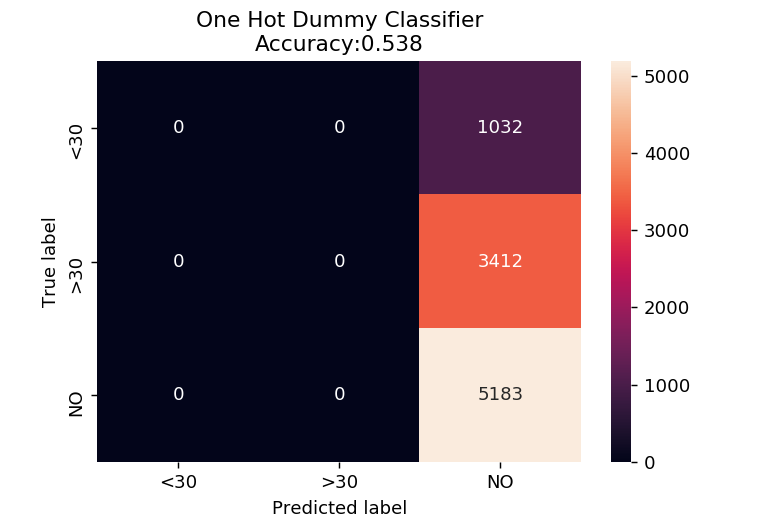

Micro-averaged precision = 0.54 (treat instances equally)
Macro-averaged precision = 0.18 (treat classes equally)
Micro-averaged f1 = 0.54 (treat instances equally)
Macro-averaged f1 = 0.23 (treat classes equally)
             precision    recall  f1-score   support

        <30       0.00      0.00      0.00      1032
        >30       0.00      0.00      0.00      3412
         NO       0.54      1.00      0.70      5183

avg / total       0.29      0.54      0.38      9627

CPU times: user 223 ms, sys: 309 ms, total: 533 ms
Wall time: 735 ms


/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lam/anaconda2/envs/my_env3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [30]:
%%time
from sklearn.dummy import DummyClassifier

d_major = DummyClassifier(strategy='most_frequent').fit(X_train_hot, y_train)

print('train accuracy: {:.2f}'.format(d_major.score(X_train_hot, y_train)))
print('test accuracy: {:.2f}'.format(d_major.score(X_test_hot, y_test)))
plot_confusion(d_major, 'One Hot Dummy Classifier', X_test_hot, y_test)

In [31]:
%%time
clf = LinearSVC(verbose=True).fit(X_train_hot, y_train)

print('training accuracy: {:.2f}'.format(clf.score(X_train_hot, y_train)))
print('test accuracy: {:.2f}'.format(clf.score(X_test_hot, y_test)))
plot_confusion(clf, 'One Hot Linear Kernel', X_test_hot, y_test )

[LibLinear]training accuracy: 0.63
test accuracy: 0.58


<IPython.core.display.Javascript object>

Micro-averaged precision = 0.58 (treat instances equally)
Macro-averaged precision = 0.48 (treat classes equally)
Micro-averaged f1 = 0.58 (treat instances equally)
Macro-averaged f1 = 0.40 (treat classes equally)
             precision    recall  f1-score   support

        <30       0.32      0.03      0.06      1032
        >30       0.51      0.38      0.44      3412
         NO       0.62      0.83      0.71      5183

avg / total       0.55      0.58      0.54      9627

CPU times: user 16.7 s, sys: 131 ms, total: 16.9 s
Wall time: 16.3 s


### <font color=orange>SVM optimise over accuracy</font>

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

clf = SVC() 

grid_values = [
  {'C': [0.1, 1, 10, 100, 1000], 'kernel':['linear', 'sigmoid']}, 
    {'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100], 'kernel':['rbf']},
    {'C': [0.1, 1, 10, 100, 1000], 'degree':[2, 3, 4, 5], 'kernel': ['poly']}
 ]

grid_clf_acc = GridSearchCV(clf, param_grid = grid_values, n_jobs= 3 )
grid_clf_acc.fit(X_train_hot, y_train)
y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_test_hot) 

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

In [ ]:
pd.DataFrame(grid_clf_acc.cv_results_).sort_values(by=['mean_test_score'], ascending=False).iloc[:,2:8]

In [ ]:
plot_confusion(grid_clf_acc, 'One Hot Grid Search Linear', X_test_hot, y_test)